In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../../")
from microfit.analysis import MultibandAnalysis

In [3]:
from importlib import reload
import logging
reload(logging)

logging.basicConfig(level=logging.WARN)

In [28]:
import toml


toml_string = """
[sideband_data]
run_numbers = [3]
data = "opendata_bnb"
blinded = false
truth_filtered_sets = ["nue", "drt"]
loadshowervariables = false
loadsystematics = true
use_bdt = false
loadpi0variables = false
numupresel = true
load_crt_vars = true
loadnumuvariables = true
enable_cache = true

[sideband]
selection = "NUMU"
preselection = "NUMU"
keep_columns = ["neutrino_energy"]

[sideband.binning]
variable = "neutrino_energy"
n_bins = 14
limits = [0.15, 1.55]
label = "Neutrino reconstructed energy [GeV]"

[sideband.uncertainties]
include_multisim_errors = true
add_ext_error_floor = false
use_sideband = false

[signal_data]
run_numbers = [1, 3]
data = "opendata_bnb"
blinded = false
# truth_filtered_sets = ["nue", "drt", "cc_pi0", "nc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"]
truth_filtered_sets = ["nue", "drt"]
loadshowervariables = true
loadsystematics = true
loadpi0variables = true
loadrecoveryvars = true
load_lee = true
enable_cache=true

[[signal]]

    selection = "NPBDT"
    preselection = "NP"
    # mc_hist_generator_cls = "SpectralSoBGenerator"
    mc_hist_generator_cls = "SignalOverBackgroundGenerator"
    keep_columns = ["reco_e"]

    [signal.uncertainties]
    include_multisim_errors = true
    add_ext_error_floor = false
    use_sideband = true

    [signal.binning]
    variable = "reco_e"
    # n_bins = 17
    # limits = [0.01, 2.39]
    # Reproduce technote
    n_bins = 10
    limits = [0.15, 1.55]
    label = "Reconstructed Energy [ GeV ]"

    [[signal.parameter]]
    name = "signal_strength"
    value = 1.0
    bounds = [0.0, 10.0]

    # [[signal.parameter]]
    # name = "delta_gamma"
    # value = 0.0
    # bounds = [-1.0, 1.0]

[[signal]]

    selection = "ZPBDT"
    preselection = "ZP"
    # mc_hist_generator_cls = "SpectralSoBGenerator"
    mc_hist_generator_cls = "SignalOverBackgroundGenerator"
    keep_columns = ["reco_e"]

    [signal.uncertainties]
    include_multisim_errors = true
    add_ext_error_floor = false
    use_sideband = true

    [signal.binning]
    variable = "reco_e"
    # n_bins = 17
    # limits = [0.01, 2.39]
    # Reproduce technote
    n_bins = 10
    limits = [0.15, 1.55]
    label = "Reconstructed Energy [ GeV ]"

    [[signal.parameter]]
    name = "signal_strength"
    value = 1.0
    bounds = [0.0, 10.0]

    # [[signal.parameter]]
    # name = "delta_gamma"
    # value = 0.0
    # bounds = [-1.0, 1.0]
"""

lee_analysis = MultibandAnalysis(toml.loads(toml_string))

Making generator for selection NUMU and preselection NUMU
Loading lee sample
Loading lee sample
Making generator for selection NPBDT and preselection NP
Making generator for selection ZPBDT and preselection ZP


In [29]:
lee_analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

In [30]:
lee_analysis.parameters["signal_strength"].value = 5.0

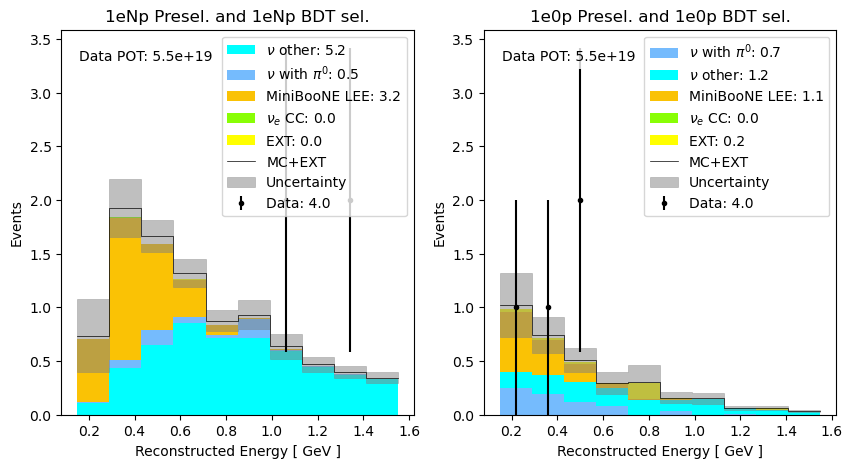

In [31]:
lee_analysis.plot_signals()

In [32]:
lee_analysis._signal_generators[0].mc_hist_generator.dataframe

,knobAxFFCCQEup,category_1e1p,knobThetaDelta2Npiup,knobThetaDelta2Npidn,knobCCMECdn,dataset_name,run,knobAxFFCCQEdn,paper_category_xsec,weightSplineTimesTune,...,weightsFlux,knobCCMECup,paper_category,knobVecFFCCQEup,weights,weightsGenie,reco_e,knobDecayAngMECup,knobRPAdn,category
entry,,,,,,,,,,,,,,,,,,,,,
2192,1.181483,12,1.179822,1.179822,1.179822,mc,7004,1.179822,2,1.137314,...,"[468, 689, 453, 828, 577, 670, 672, 669, 728, ...",1.179822,2,1.162720,0.039415,"[1388, 1000, 838, 1276, 1134, 1390, 1166, 1141...",0.855347,1.179822,1.315394,2
7567,1.000000,13,1.301085,1.000000,1.000000,mc,6583,1.000000,31,1.000000,...,"[907, 1164, 827, 1172, 978, 1016, 901, 1005, 9...",1.000000,31,1.000000,0.034656,"[845, 154, 303, 600, 508, 1157, 848, 550, 358,...",0.894524,1.000000,1.000000,31
9013,1.000000,12,1.000000,1.000000,1.000000,mc,6656,1.000000,31,1.000000,...,"[874, 1041, 831, 1056, 993, 912, 898, 911, 895...",1.000000,31,1.000000,0.034656,"[1975, 1009, 2081, 408, 995, 556, 820, 1813, 4...",0.921970,1.000000,1.000000,31
11166,1.000000,12,1.000000,1.000000,1.000000,mc,7023,1.000000,31,1.000000,...,"[817, 954, 993, 1131, 913, 963, 943, 870, 977,...",1.000000,31,1.000000,0.034656,"[1187, 370, 564, 731, 698, 180, 882, 507, 517,...",0.614587,1.000000,1.000000,31
12378,1.000000,12,1.000000,1.000000,1.000000,mc,7021,1.000000,31,1.000000,...,"[1723, 1237, 385, 569, 663, 1189, 943, 1683, 7...",1.000000,31,1.000000,0.034656,"[625, 1179, 1601, 622, 1507, 768, 1719, 324, 1...",2.310959,1.000000,1.000000,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61692,1.176065,12,1.161586,1.161586,1.161586,lee,18258,1.161586,2,1.120772,...,"[1423, 1536, 256, 1257, 845, 587, 544, 1204, 1...",1.161586,111,1.222723,0.000000,"[1259, 1083, 951, 1218, 1105, 1284, 1141, 1157...",1.592251,1.161586,1.056502,111
61706,1.178844,12,1.161279,1.161279,1.161279,lee,18953,1.161279,2,1.125175,...,"[961, 1087, 883, 1148, 1027, 958, 1002, 961, 1...",1.161279,111,1.218838,0.000000,"[1283, 1046, 923, 1219, 1122, 1283, 1150, 1138...",2.276706,1.161279,1.117231,111
61723,1.000000,12,1.557648,1.000000,1.000000,lee,18953,1.000000,2,1.000000,...,"[982, 1073, 935, 1184, 1113, 938, 982, 943, 92...",1.000000,111,1.000000,0.000000,"[1024, 276, 307, 669, 316, 1641, 835, 1116, 66...",1.324373,1.000000,1.000000,111


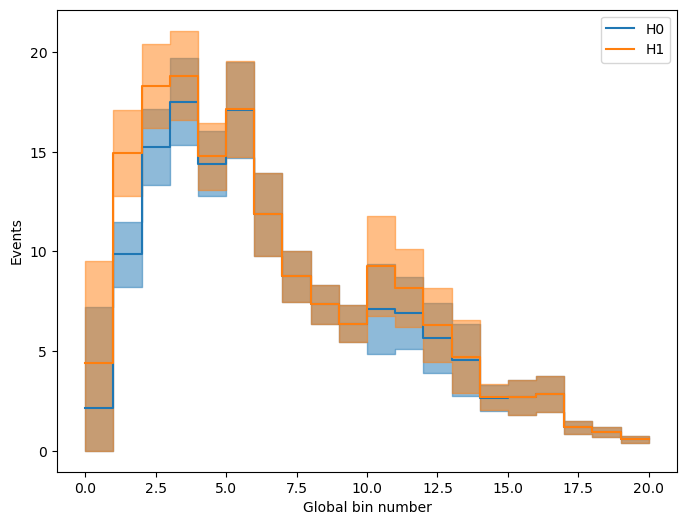

In [33]:
import matplotlib.pyplot as plt
from microfit.parameters import ParameterSet, Parameter

h0_params = ParameterSet(
    [Parameter("signal_strength", 0.0, [0.0, 10.0])]
)
h1_params = ParameterSet(
    [Parameter("signal_strength", 1.0, [0.0, 10.0])]
)
lee_analysis.set_parameters(h0_params)
h0_histogram = lee_analysis.generate_multiband_histogram(scale_to_pot=1e21, include_multisim_errors=True, use_sideband=True)
lee_analysis.set_parameters(h1_params)
h1_histogram = lee_analysis.generate_multiband_histogram(scale_to_pot=1e21, include_multisim_errors=True, use_sideband=True)

fig, ax = plt.subplots(figsize=(8, 6))
h0_histogram.draw(ax=ax, label="H0")
h1_histogram.draw(ax=ax, label="H1")
ax.legend()
plt.show()

In [34]:
from microfit.parameters import ParameterSet, Parameter

h0_params = ParameterSet(
    [Parameter("signal_strength", 0.0, [0.0, 10.0])]
)
h1_params = ParameterSet(
    [Parameter("signal_strength", 1.0, [0.0, 10.0])]
)
two_hypo_results = lee_analysis.two_hypothesis_test(h0_params=h0_params, h1_params=h1_params, n_trials=1000, scale_to_pot=1e21, sensitivity_only=True)

In [35]:
two_hypo_results.keys()

dict_keys(['ts_median_h1', 'median_pval', 'samples_h0', 'samples_h1', 'chi2_h0', 'pval_h0', 'chi2_h1', 'pval_h1'])

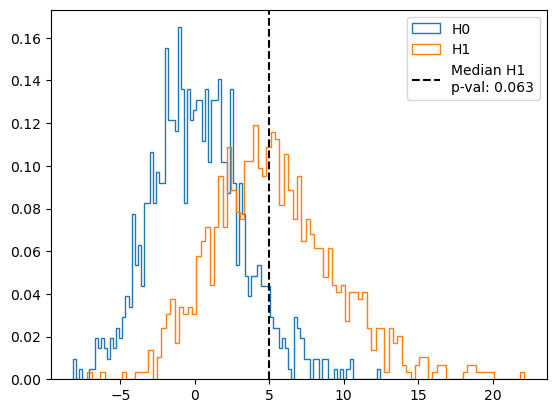

In [36]:
from matplotlib import pyplot as plt
plt.hist(two_hypo_results["samples_h0"], bins=100, histtype="step", density=True, label="H0")
plt.hist(two_hypo_results["samples_h1"], bins=100, histtype="step", density=True, label="H1")
plt.axvline(x=two_hypo_results["ts_median_h1"], color="k", linestyle="--", label=f"Median H1\np-val: {two_hypo_results['median_pval']:0.3f}")
plt.legend()
plt.show()

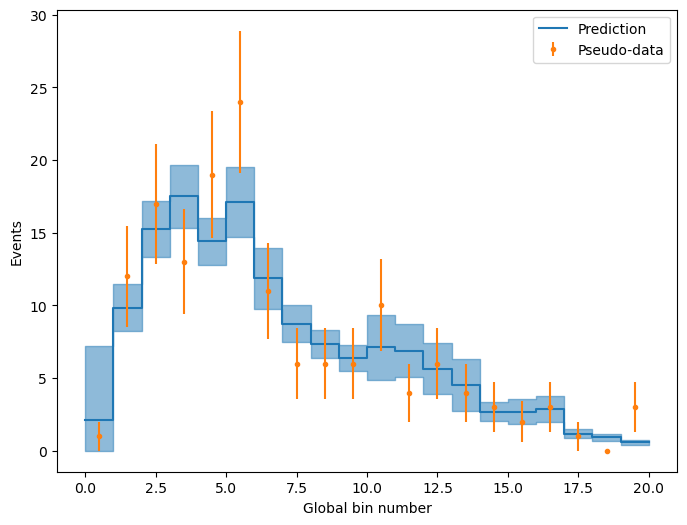

In [37]:
target_pot = 1e21
lee_analysis.set_parameters(h0_params)
prediction = lee_analysis.generate_multiband_histogram(
    scale_to_pot=target_pot, include_multisim_errors=True, use_sideband=True
)
pseudo_data = prediction.fluctuate_poisson()

fig, ax = plt.subplots(figsize=(8, 6))
prediction.draw(ax=ax, label="Prediction")
pseudo_data.draw(ax=ax, label="Pseudo-data", as_errorbars=True)
ax.legend()
plt.show()

In [38]:
m = lee_analysis._get_minuit(pseudo_data, scale_to_pot=target_pot)
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 31.32                      │         Nfcn = 23 (23 total)         │
│ EDM = 3.2e-07 (Goal: 0.0002)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name            │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ signal_strength │    0.6    │    0.8    │            │            │    0    │   10    │       │
└───┴─────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [39]:
best_fit_params = lee_analysis.parameters.copy()
best_fit_params

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	0.6417027098		(0, 10)

In [40]:
m.minos()

return Minos error 

┌──────────┬───────────────────────┐
│          │    signal_strength    │
├──────────┼───────────┬───────────┤
│  Error   │   -0.6    │    0.9    │
│  Valid   │   True    │   True    │
│ At Limit │   True    │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘

0  , 0.167425


/Users/trettin/miniconda/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


(array([-0.88914038, -0.78353468, -0.67792898, -0.57232327, -0.46671757,
        -0.36111187, -0.25550617, -0.14990046, -0.04429476,  0.06131094,
         0.16691664,  0.27252235,  0.37812805,  0.48373375,  0.58933945,
         0.69494516,  0.80055086,  0.90615656,  1.01176226,  1.11736796,
         1.22297367,  1.32857937,  1.43418507,  1.53979077,  1.64539648,
         1.75100218,  1.85660788,  1.96221358,  2.06781929,  2.17342499]),
 array([8.32231173e-01, 8.32231173e-01, 8.32231173e-01, 8.32231173e-01,
        8.32231173e-01, 8.32231173e-01, 8.32231173e-01, 8.32231173e-01,
        8.32231173e-01, 6.66252781e-01, 4.29022748e-01, 2.48681119e-01,
        1.20144632e-01, 3.87050240e-02, 1.73608216e-06, 0.00000000e+00,
        3.49720701e-02, 1.01480194e-01, 1.96360479e-01, 3.16707181e-01,
        4.59857226e-01, 6.23374885e-01, 8.05036660e-01, 1.00281646e+00,
        1.21487115e+00, 1.43952666e+00, 1.67526457e+00, 1.92070946e+00,
        2.17461690e+00, 2.43586219e+00]))

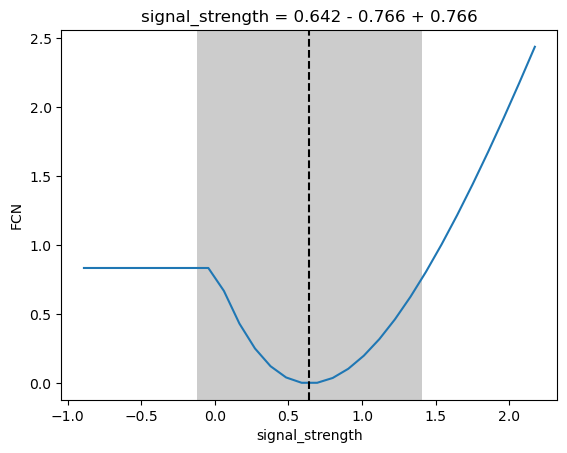

In [41]:
m.draw_mnprofile("signal_strength", subtract_min=True)

In [42]:
scan_points = np.linspace(0.0, 10.0, 20)
fc_scan = lee_analysis.fc_scan("signal_strength", scan_points=scan_points, scale_to_pot=target_pot, n_trials=100)

Running FC scan over 20 points in signal_strength...


  5%|▌         | 1/20 [00:44<14:10, 44.77s/it]


RuntimeError: exception was raised in user function
User function arguments:
    signal_strength = +0.138742


(array([34., 25., 15.,  9.,  9.,  3.,  1.,  2.,  0.,  2.]),
 array([3.54574842e-03, 1.18348133e+00, 2.36341692e+00, 3.54335250e+00,
        4.72328808e+00, 5.90322367e+00, 7.08315925e+00, 8.26309484e+00,
        9.44303042e+00, 1.06229660e+01, 1.18029016e+01]),
 <BarContainer object of 10 artists>)

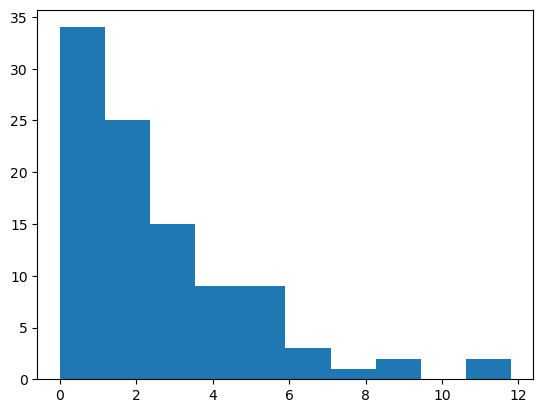

In [21]:
plt.hist(fc_scan[5]["delta_chi2"])

(0.0, 10.0)

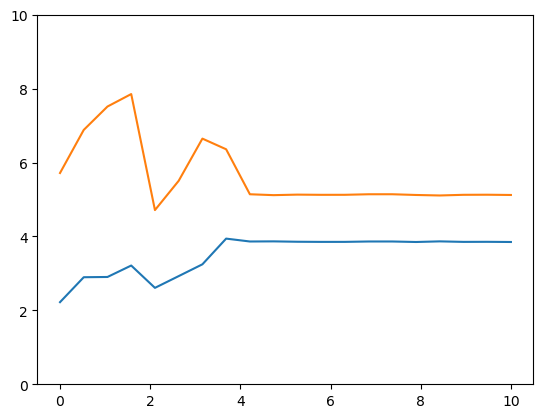

In [22]:
level_68 = [np.percentile(s["delta_chi2"], 68.0) for s in fc_scan]
level_90 = [np.percentile(s["delta_chi2"], 90.0) for s in fc_scan]
plt.plot(scan_points, level_68, label="68% CL")
plt.plot(scan_points, level_90, label="90% CL")
plt.ylim((0.0, 10.0))

In [58]:
randomized_scan_points = np.random.uniform(0.0, 5.0, 1000)
randomized_fc_scan = lee_analysis.fc_scan("signal_strength", scan_points=randomized_scan_points, scale_to_pot=target_pot, n_trials=1)

Running FC scan over 1000 points in signal_strength...


100%|██████████| 1000/1000 [07:02<00:00,  2.37it/s]


In [41]:
randomized_fc_scan[4]

{'delta_chi2': array([7.94425249]), 'scan_point': 2.603047709023187}

In [53]:
X = randomized_scan_points[:, np.newaxis]
y = np.array([s["delta_chi2"][0] for s in randomized_fc_scan])

100%|██████████| 20/20 [00:31<00:00,  1.56s/it]


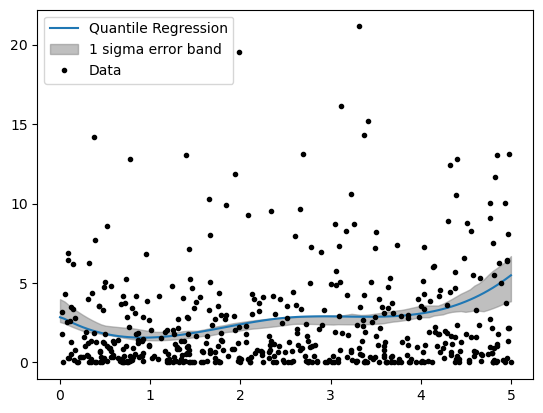

In [57]:
from sklearn.preprocessing import SplineTransformer, StandardScaler
from sklearn.linear_model import QuantileRegressor
from sklearn.pipeline import make_pipeline
from tqdm import tqdm

pipeline = make_pipeline(
    SplineTransformer(n_knots=3, degree=3),
    # StandardScaler(),
    QuantileRegressor(quantile=0.68, alpha=0.0)
)

pipeline.fit(X, y)
X_plot = np.linspace(0.0, 5.0, 100)[:, np.newaxis]
y_plot = pipeline.predict(X_plot)


n_bootstrap_samples = 20
bootstrap_preds = []

for _ in tqdm(range(n_bootstrap_samples)):
    # Sample with replacement
    indices = np.random.choice(len(X), len(X), replace=True)
    X_sample = X[indices]
    y_sample = y[indices]

    # Fit the model on the sample and predict
    pipeline.fit(X_sample, y_sample)
    y_pred = pipeline.predict(X_plot)
    bootstrap_preds.append(y_pred)

bootstrap_preds = np.array(bootstrap_preds)
lower_bound = np.percentile(bootstrap_preds, 16, axis=0)
upper_bound = np.percentile(bootstrap_preds, 84, axis=0)


plt.plot(X_plot, y_plot, label="Quantile Regression")
plt.fill_between(X_plot.flatten(), lower_bound, upper_bound, color='gray', alpha=0.5, label="1 sigma error band")
plt.plot(X.flatten(), y, "k.", label="Data")
plt.legend()
plt.show()


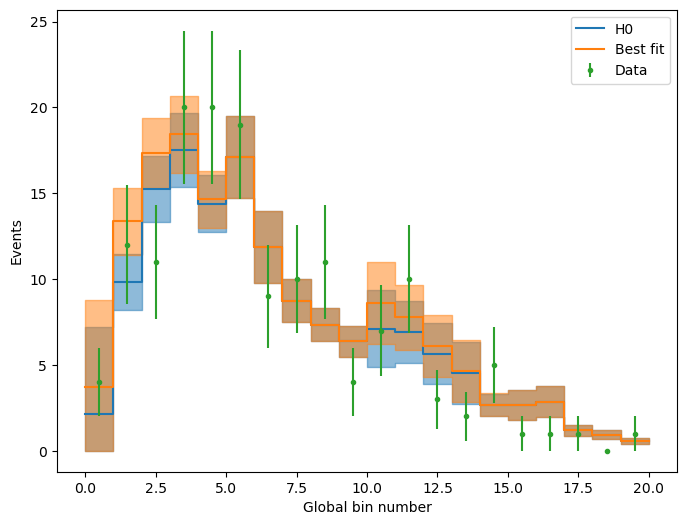

In [15]:
from matplotlib import pyplot as plt

lee_analysis.set_parameters(h0_params)
mc_hist_h0 = lee_analysis.generate_multiband_histogram(include_multisim_errors=True, use_sideband=True, scale_to_pot=target_pot)
lee_analysis.set_parameters(best_fit_params)
mc_hist_best_fit = lee_analysis.generate_multiband_histogram(include_multisim_errors=True, use_sideband=True, scale_to_pot=target_pot)
data_hist = pseudo_data
fig, ax = plt.subplots(figsize=(8, 6))

mc_hist_h0.draw(ax=ax, label="H0")
mc_hist_best_fit.draw(ax=ax, label="Best fit")
data_hist.draw(ax=ax, label="Data", as_errorbars=True)
ax.legend()

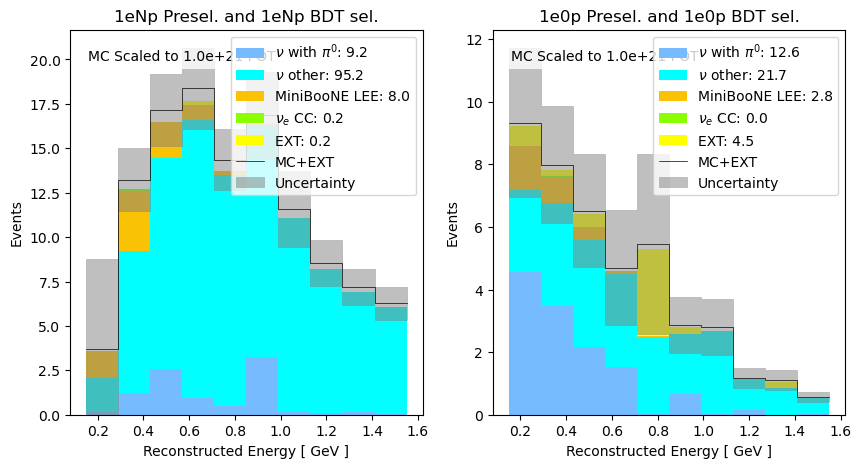

In [16]:
lee_analysis.plot_signals(scale_to_pot=target_pot)

In [17]:
lee_analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	0.6918285262		(0, 10)

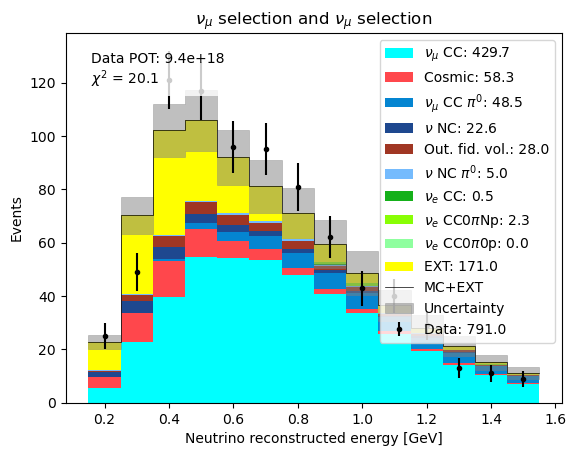

In [18]:
lee_analysis.plot_sideband(show_chi_square=True)

(<Figure size 800x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Multiband Correlation: weightsFlux'}>)

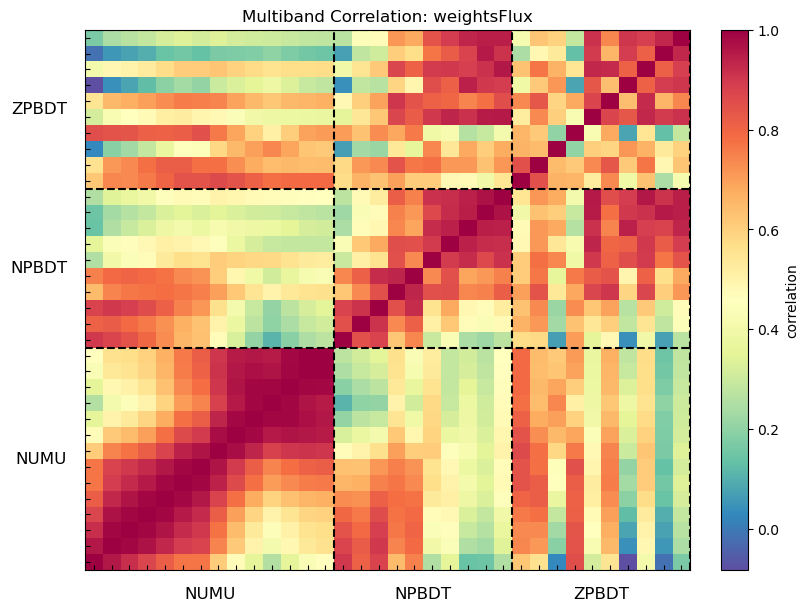

In [19]:
lee_analysis.plot_correlation(ms_column="weightsFlux")

In [20]:
%load_ext line_profiler


In [39]:
lee_analysis.set_parameters(h0_params)
m = lee_analysis._get_minuit(pseudo_data, scale_to_pot=target_pot)

In [40]:
%lprun -f lee_analysis._get_total_multiband_covariance m.migrad()

Timer unit: 1e-09 s

Total time: 0.495309 s
File: ../../plotting/analysis.py
Function: _get_total_multiband_covariance at line 205

Line #      Hits         Time  Per Hit   % Time  Line Contents
   205                                               def _get_total_multiband_covariance(self, with_unisim=False, with_stat_only=False, include_sideband=False):
   206        46      29000.0    630.4      0.0          hist_generators = []
   207        46      66000.0   1434.8      0.0          hist_generators.extend([g.mc_hist_generator for g in self._signal_generators])
   208        46      19000.0    413.0      0.0          if self._sideband_generator is not None and include_sideband:
   209        23      15000.0    652.2      0.0              hist_generators.append(self._sideband_generator.mc_hist_generator)
   210        46     150000.0   3260.9      0.0          total_nbins = sum([g.binning.n_bins for g in hist_generators])
   211        46      74000.0   1608.7      0.0          combin

In [21]:
hg_instance = lee_analysis._signal_generators[0].mc_hist_generator

In [ ]:
lee_analysis.set_parameters(h0_params)
m = lee_analysis._get_minuit(pseudo_data, scale_to_pot=target_pot)

In [41]:
%lprun -f hg_instance.multiband_unisim_covariance m.migrad()

Timer unit: 1e-09 s

Total time: 0.119082 s
File: ../../plotting/histogram.py
Function: multiband_unisim_covariance at line 1269

Line #      Hits         Time  Per Hit   % Time  Line Contents
  1269                                               @classmethod
  1270                                               def multiband_unisim_covariance(cls, hist_generators):
  1271                                                   """Calculate the covariance matrix for multiple histograms.
  1272                                           
  1273                                                   Given a list of HistogramGenerator objects, calculate the covariance matrix of the
  1274                                                   unisim universes. The underlying assumption
  1275                                                   is that the weights listed in the unisim column are from the same universes
  1276                                                   in the same order for all histogram

In [26]:
expectation = lee_analysis.generate_multiband_histogram(scale_to_pot=target_pot, include_multisim_errors=True, use_sideband=True)

In [29]:
%lprun -f expectation.__init__ lee_analysis.generate_multiband_histogram(include_multisim_errors=True, use_sideband=True, scale_to_pot=target_pot)

Timer unit: 1e-09 s

Total time: 0.007974 s
File: ../../plotting/histogram.py
Function: __init__ at line 105

Line #      Hits         Time  Per Hit   % Time  Line Contents
   105                                               def __init__(
   106                                                   self,
   107                                                   binning,
   108                                                   bin_counts,
   109                                                   uncertainties=None,
   110                                                   covariance_matrix=None,
   111                                                   label=None,
   112                                                   plot_color=None,
   113                                                   tex_string=None,
   114                                                   check_psd=True
   115                                               ):
   116                                                   ""

In [62]:
from microfit.statistics import chi_square

# Prototype the feldman-cousins method
parameter_name = "signal_strength"
scan_points = np.linspace(0.0, 5.0, 20)
n_trials = 100
level = 0.9

from tqdm import tqdm

results = []
for scan_point in tqdm(scan_points):
    lee_analysis.parameters[parameter_name].value = scan_point
    expectation = lee_analysis.generate_multiband_histogram(scale_to_pot=target_pot, include_multisim_errors=True, use_sideband=True)
    delta_chi2 = []
    for i in range(n_trials):
        pseudo_data = expectation.fluctuate(seed=i * 2).fluctuate_poisson(seed=i * 2 + 1)
        lee_analysis.parameters[parameter_name].value = scan_point
        chi2_at_truth = chi_square(pseudo_data.bin_counts, expectation.bin_counts, expectation.cov_matrix)
        m = lee_analysis._get_minuit(pseudo_data, scale_to_pot=target_pot)
        m.migrad()
        chi2_at_best_fit = m.fval
        delta_chi2.append(chi2_at_truth - chi2_at_best_fit)
    delta_chi2 = np.array(delta_chi2)
    results.append(delta_chi2)

100%|██████████| 20/20 [12:49<00:00, 38.45s/it]


(array([47., 18., 11.,  9.,  4.,  6.,  3.,  1.,  0.,  1.]),
 array([1.07975371e-06, 1.27200533e+00, 2.54400959e+00, 3.81601384e+00,
        5.08801809e+00, 6.36002235e+00, 7.63202660e+00, 8.90403085e+00,
        1.01760351e+01, 1.14480394e+01, 1.27200436e+01]),
 <BarContainer object of 10 artists>)

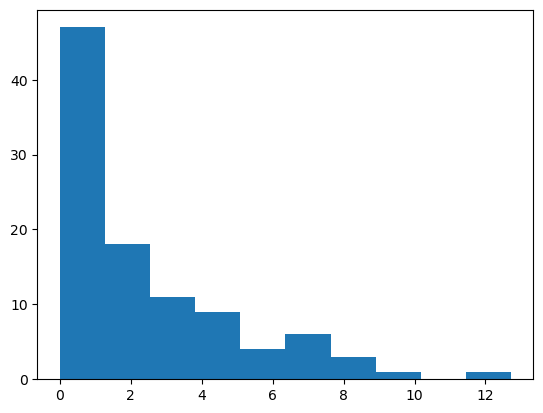

In [63]:
plt.hist(results[3])

In [59]:
import numpy as np
import json

# Custom JSON Encoder that can handle numpy arrays
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            # Add a flag to know it was a numpy array
            return {"_is_numpy_array": True, "data": obj.tolist()}
        return super(NumpyEncoder, self).default(obj)

# Custom JSON Decoder to handle numpy arrays
def numpy_decoder(dct):
    if "_is_numpy_array" in dct:
        return np.array(dct["data"])
    return dct

# Sample dictionary with nested numpy arrays
data = {
    "name": "John",
    "data": {
        "scores": np.array([1, 2, 3]),
        "info": {
            "grades": np.array([4, 5, 6]),
            "friends": ["Alice", "Bob"]
        }
    }
}

# Encoding data
serialized_data = json.dumps(data, cls=NumpyEncoder)
print("Serialized Data:", serialized_data)

# Decoding data
deserialized_data = json.loads(serialized_data, object_hook=numpy_decoder)
print("Deserialized Data:", deserialized_data)
print("Type of 'scores':", type(deserialized_data["data"]["scores"]))
print("Type of 'grades':", type(deserialized_data["data"]["info"]["grades"]))


Serialized Data: {"name": "John", "data": {"scores": {"_is_numpy_array": true, "data": [1, 2, 3]}, "info": {"grades": {"_is_numpy_array": true, "data": [4, 5, 6]}, "friends": ["Alice", "Bob"]}}}
Deserialized Data: {'name': 'John', 'data': {'scores': array([1, 2, 3]), 'info': {'grades': array([4, 5, 6]), 'friends': ['Alice', 'Bob']}}}
Type of 'scores': <class 'numpy.ndarray'>
Type of 'grades': <class 'numpy.ndarray'>


In [61]:
toml_string = """
binning_def = [14, 15, 56]
"""

toml.loads(toml_string)

{'binning_def': [14, 15, 56]}